In [83]:
# 파일 불러오기
import pandas as pd
import numpy as np
weather_df = pd.read_csv("/content/seattle-weather.csv", encoding = "UTF-8")

In [44]:
# 넘파이 배열로 바꾸기
def convert_weather(data):
  if data == 'sun':
    return 0
  elif data == 'rain':
    return 1
  elif data == 'snow':
    return 2
  elif data == 'drizzle':
    return 3
  elif data == 'fog':
    return 4
weather_df['weather']=weather_df['weather'].apply(convert_weather)
data = weather_df[['temp_max', 'temp_min', 'wind']].to_numpy()
target = weather_df['weather'].to_numpy()

In [101]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=20)

In [50]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [97]:
# 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV
grid_search={'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(3, 20, 1),
          'min_samples_split': range(2, 100, 5)
}
gs=GridSearchCV(DecisionTreeClassifier(random_state=20), param_grid = grid_search, cv = 4, verbose= 5, n_jobs = -1)
gs.fit(train_scaled, train_target)

Fitting 4 folds for each of 3060 candidates, totalling 12240 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': range(3, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 5)},
             verbose=5)

In [98]:
print(gs.best_params_)
gs.best_estimator_

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 72}


DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.0001,
                       min_samples_split=72, random_state=20)

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt= gs.best_estimator_
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.6977739726027398
0.6484641638225256


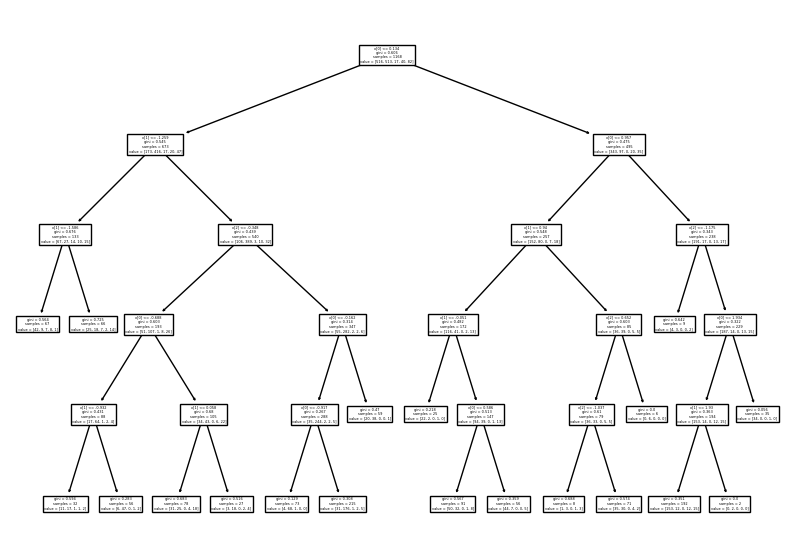

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()